1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/root/STA326_Assignment2/datasets/data_orders.csv')
offers = pd.read_csv('/root/STA326_Assignment2/datasets/data_offers.csv')

In [3]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [4]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


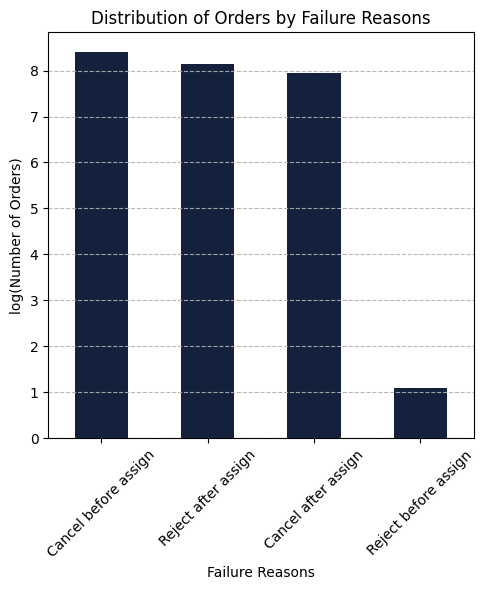

The category with the highest number of orders is 'Cancel before assign' with 8.410943391573527 orders.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/root/STA326_Assignment2/datasets/data_orders.csv')

# Create a function to categorize orders based on reasons for failure
def categorize_order(order):
    if order['order_status_key'] == 4 and order['is_driver_assigned_key'] == 0:
        return 'Cancel before assign'
    elif order['order_status_key'] == 4 and order['is_driver_assigned_key'] == 1:
        return 'Cancel after assign'
    elif order['order_status_key'] == 9 and order['is_driver_assigned_key'] == 1:
        return 'Reject before assign'
    else:
        return 'Reject after assign'

# Apply the function to create a new column 'failure_reason'
data['failure_reason'] = data.apply(categorize_order, axis=1)

plt.figure(figsize=(5, 6))
order_distribution = np.log(data['failure_reason'].value_counts())
order_distribution.plot(kind='bar', color=(19/255,33/255,60/255))
plt.title('Distribution of Orders by Failure Reasons')
plt.xlabel('Failure Reasons')
plt.ylabel('log(Number of Orders)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

# Identify the category with the highest number of orders
highest_category = order_distribution.idxmax()
highest_orders = order_distribution.max()

print(f"The category with the highest number of orders is '{highest_category}' with {highest_orders} orders.")

2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?


In [6]:
data['orderTime_by_hour'] = pd.to_datetime(data['order_datetime']).dt.hour

/tmp/ipykernel_84144/3948891251.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['orderTime_by_hour'] = pd.to_datetime(data['order_datetime']).dt.hour


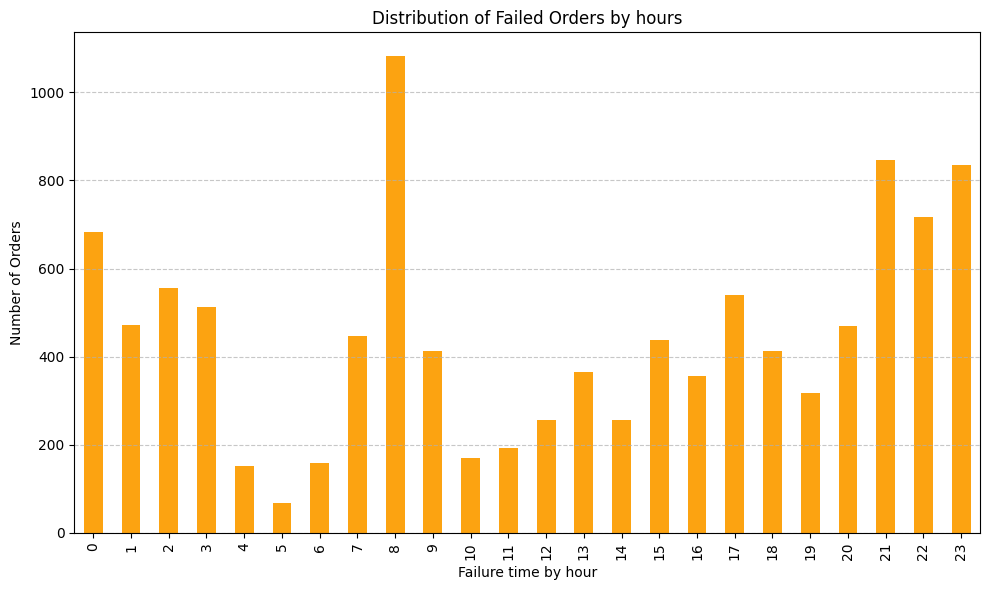

In [7]:
plt.figure(figsize=(10, 6))
order_distribution = data['orderTime_by_hour'].value_counts().sort_index()
order_distribution.plot(kind='bar', color=(252/255,163/255,17/255))
plt.title('Distribution of Failed Orders by hours')
plt.xlabel('Failure time by hour')
plt.ylabel('Number of Orders')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
cancel_before_assign = data[data["failure_reason"] == 'Cancel before assign']
cancel_after_assign = data[data["failure_reason"] == 'Cancel after assign']
reject_before_assign = data[data["failure_reason"] == 'Reject before assign']
reject_after_assign = data[data["failure_reason"] == 'Reject after assign']

cancel_before_assign_by_hour = cancel_before_assign.groupby('orderTime_by_hour').size()
cancel_after_assign_by_hour = cancel_after_assign.groupby('orderTime_by_hour').size()
reject_before_assign_by_hour = reject_before_assign.groupby('orderTime_by_hour').size()
reject_after_assign_by_hour = reject_after_assign.groupby('orderTime_by_hour').size()

merged_data = {
    'Hour': range(24),
    'Cancel Before Assign': cancel_before_assign_by_hour.reindex(range(24), fill_value=0).values,
    'Cancel After Assign': cancel_after_assign_by_hour.reindex(range(24), fill_value=0).values,
    'Reject Before Assign': reject_before_assign_by_hour.reindex(range(24), fill_value=0).values,
    'Reject After Assign': reject_after_assign_by_hour.reindex(range(24), fill_value=0).values
}

merged_data = pd.DataFrame(merged_data)

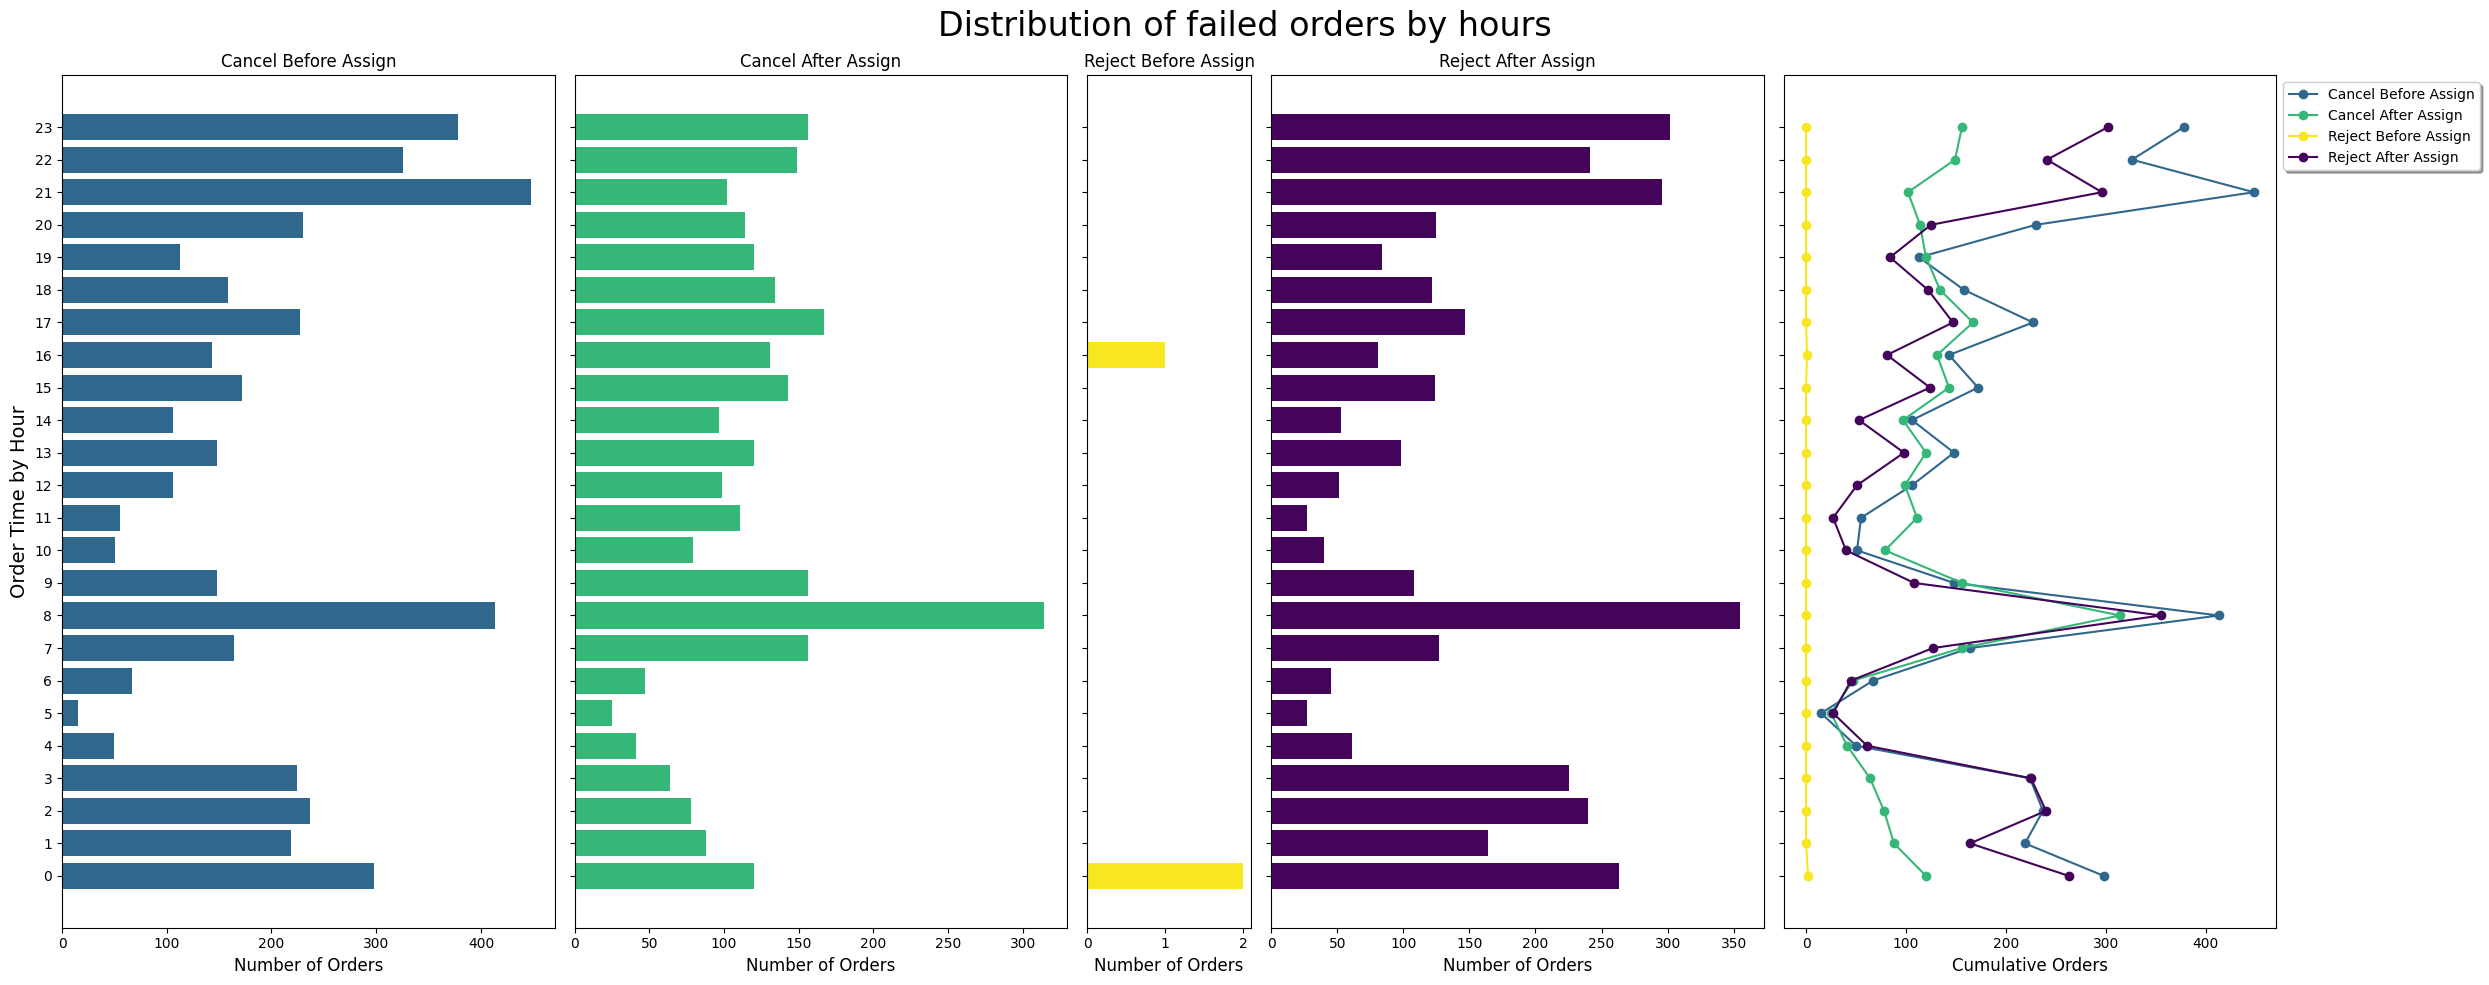

In [9]:
import matplotlib.pyplot as plt

categories = ['Cancel Before Assign', 'Cancel After Assign', 'Reject Before Assign', 'Reject After Assign']

category_colors = {
    'Cancel Before Assign': (48/255, 104/255, 141/255),
    'Cancel After Assign': (53/255, 183/255, 119/255),
    'Reject Before Assign': (248/255, 230/255, 32/255),
    'Reject After Assign': (68/255, 4/255, 90/255)
}

fig, axs = plt.subplots(1, 5, figsize=(25, 10), gridspec_kw={'width_ratios': [3, 3, 1, 3, 3]}, sharey=True)

for i, ax in enumerate(axs[:-1]):
    ax.barh(merged_data.iloc[:, 0], merged_data.iloc[:, i+1], color=category_colors[categories[i]])
    ax.set_title(categories[i])
    ax.set_xlabel("Number of Orders", fontsize=12)
    # Adjust x axis length
    ax.set_yticks(merged_data.iloc[:, 0])
    ax.set_yticklabels(merged_data.iloc[:, 0], fontsize=10)

# Plot line chart
for i, ax in enumerate(axs[-1:]):
    for j, category in enumerate(categories):
        ax.plot(merged_data.iloc[:, j+1], merged_data.iloc[:, 0], marker='o', color=category_colors[category], label=category)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
    ax.set_xlabel("Cumulative Orders", fontsize=12)
    # ax.set_yticks([])  # Disable x-axis ticks


axs[0].set_ylabel('Order Time by Hour', fontsize=14)

plt.suptitle("Distribution of failed orders by hours", fontsize=24)
plt.tight_layout()
plt.show()

In [10]:
for i,ax in enumerate(axs[-1:]):
    print(i)

0


In [11]:
merged_data.iloc[:, 1]

0     298
1     219
2     237
3     224
4      50
5      15
6      67
7     164
8     413
9     148
10     51
11     55
12    106
13    148
14    106
15    172
16    143
17    227
18    158
19    113
20    230
21    448
22    326
23    378
Name: Cancel Before Assign, dtype: int64

3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [12]:
print(data.columns)

Index(['order_datetime', 'origin_longitude', 'origin_latitude', 'm_order_eta',
       'order_gk', 'order_status_key', 'is_driver_assigned_key',
       'cancellations_time_in_seconds', 'failure_reason', 'orderTime_by_hour'],
      dtype='object')


In [13]:
# Identify outliers
from scipy.stats import zscore

data['cancellation_time_zscore'] = zscore(data['cancellations_time_in_seconds'])
threshold = 3
outliers = data[abs(data['cancellation_time_zscore']) > threshold]
print("Number of outliers:", outliers.shape[0])
print(outliers)

Number of outliers: 0
Empty DataFrame
Columns: [order_datetime, origin_longitude, origin_latitude, m_order_eta, order_gk, order_status_key, is_driver_assigned_key, cancellations_time_in_seconds, failure_reason, orderTime_by_hour, cancellation_time_zscore]
Index: []


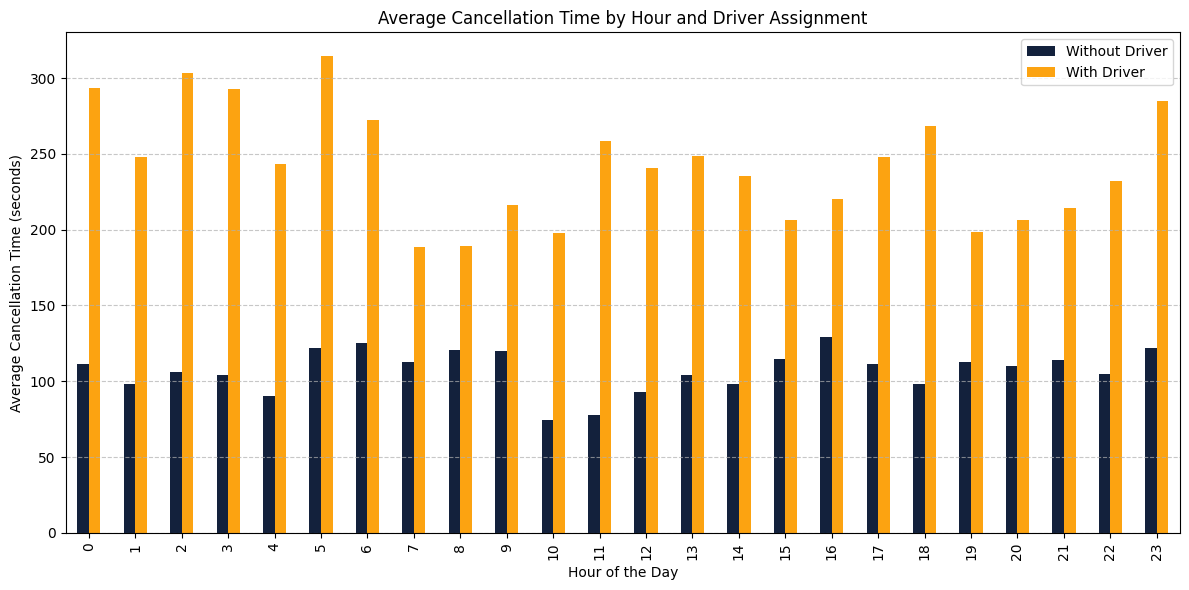

In [14]:
grouped_data = data.groupby(['orderTime_by_hour', 'is_driver_assigned_key'])

avg_cancellation_time = grouped_data['cancellations_time_in_seconds'].mean().unstack()

avg_cancellation_time.plot(kind='bar', figsize=(12, 6), color=[(19/255,33/255,60/255), (252/255,163/255,17/255)])
plt.title('Average Cancellation Time by Hour and Driver Assignment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Cancellation Time (seconds)')
plt.xticks(range(24))
plt.legend(['Without Driver', 'With Driver'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. Plot the distribution of average ETA by hours. How can this plot be explained?

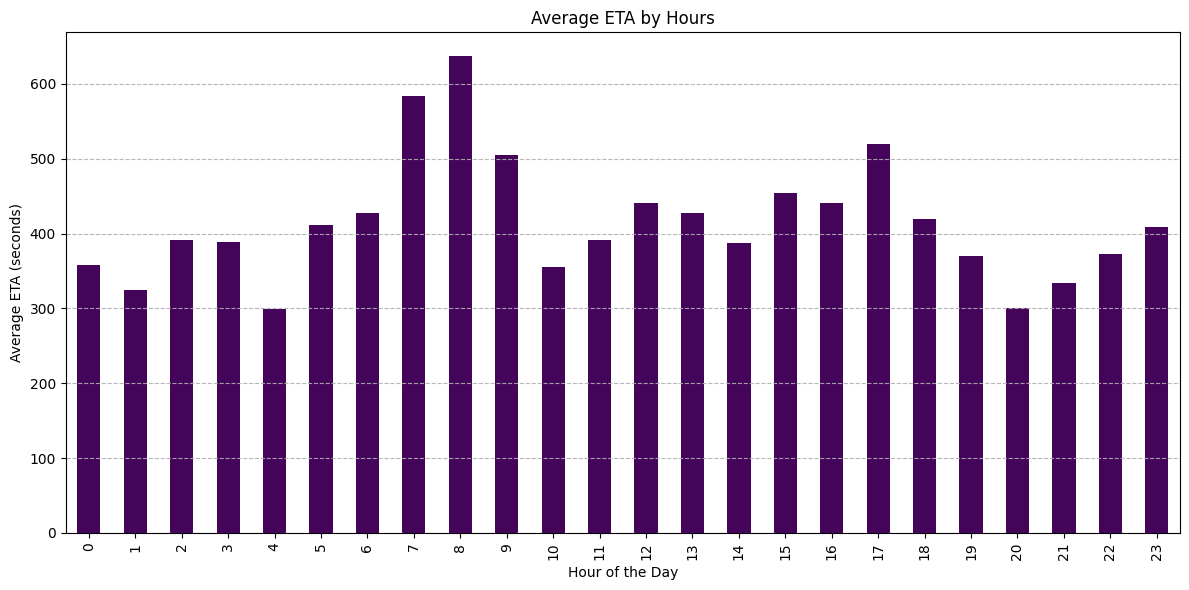

In [15]:
assigned_order = data[data['is_driver_assigned_key']==1]
ETA_by_hours = data.groupby('orderTime_by_hour')

avg_ETA = ETA_by_hours['m_order_eta'].mean()

avg_ETA.plot(kind='bar', figsize=(12, 6), color=(68/255, 4/255, 90/255))
plt.title('Average ETA by Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Average ETA (seconds)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

5. BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [16]:
import numpy as np
import folium
import h3

data['hex_id'] = data.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)

hex_fails = data.groupby('hex_id').size().reset_index(name='fail_count')

hex_fails = hex_fails.sort_values(by='fail_count', ascending=False)

hex_fails['cumulative_fail_count'] = hex_fails['fail_count'].cumsum()

# Find the hexagons containing 80% of all orders
total_orders = hex_fails['fail_count'].sum()
target_orders = total_orders * 0.8
selected_hexes = hex_fails[hex_fails['cumulative_fail_count'] <= target_orders]

In [17]:
# Normalization
max_fail_count = selected_hexes['fail_count'].max()
min_fail_count = selected_hexes['fail_count'].min()
selected_hexes['normalized_fail_count'] = (selected_hexes['fail_count'] - min_fail_count) / (max_fail_count - min_fail_count)

white = np.array([255, 255, 255, 255])  
orange = np.array([255, 165, 0, 128])   

def fail_count_to_color(fail_count):
    color = (1 - fail_count) * white + fail_count * orange
    return "#{:02x}{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]), int(color[3]))

map_center = (data['origin_latitude'].mean(), data['origin_longitude'].mean())
m = folium.Map(location=map_center, zoom_start=10, tiles='cartodbpositron')

# Visualize the hexagons on a map
for index, row in selected_hexes.iterrows():
    hex_coords = h3.h3_to_geo_boundary(row['hex_id'])
    fail_count = row['normalized_fail_count']
    fill_color = fail_count_to_color(fail_count)
    folium.Polygon(locations=hex_coords, fill_color=fill_color, fill_opacity=0.7, color='black').add_to(m)

m.save('hexagons_map_gradient.html')

/tmp/ipykernel_84144/4067032433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_hexes['normalized_fail_count'] = (selected_hexes['fail_count'] - min_fail_count) / (max_fail_count - min_fail_count)
